In [5]:
import numpy as np 
import matplotlib.pyplot as plt 

In [6]:
data = np.load('coverage_interval_96.npz')
data.files

['coverage_list', 'interval_list']

In [7]:
coverage_list = data['coverage_list']
interval_list = data['interval_list']

In [8]:
node = coverage_list.shape[1]

In [9]:
node_idx = 0

node_coverage = coverage_list[:,node_idx]
node_coverage = np.reshape(node_coverage, (96,96))

node_interval = interval_list[:, node_idx]
node_interval = np.reshape(node_interval, (96,96))

In [10]:
# plt.imshow(node_coverage)
# plt.colorbar()

In [11]:
# plt.imshow(node_interval)
# plt.colorbar()

In [12]:
interval_t = []
coverage_t = []
for t in range(node):
    idx_t = np.where(coverage_list[:,t] >= 0.88)[0]
    if len(idx_t):
        idx_t = idx_t[0]
        # idx_t = min(idx_t[0], 70*70)
        interval_t.append(interval_list[idx_t, t])
        coverage_t.append(coverage_list[idx_t, t])
    else:
        interval_t.append(interval_list[0, t])
        coverage_t.append(coverage_list[0, t])



print(np.mean(interval_t))
print(np.mean(coverage_t))


31.516342
0.8818705


In [23]:
weight = 0.4
# node_idx = 0

coverage_rec = []
interval_rec = []

for node_idx in range(node):

    interval_nor = interval_list[:, node_idx]
    interval_nor = (interval_nor - min(interval_nor)) / (max(interval_nor) - min(interval_nor))


    coverage_nor = coverage_list[:, node_idx]
    coverage_nor = (coverage_nor - min(coverage_nor)) / (max(coverage_nor) - min(coverage_nor))

    # obj = weight * interval_nor + (1-weight)* coverage_nor

    obj =  weight * interval_nor - (1-weight) * coverage_nor

    obj_min_idx = np.argmin(obj)

    coverage_rec.append(coverage_list[obj_min_idx, node_idx])
    interval_rec.append(interval_list[obj_min_idx, node_idx])


print(np.mean(coverage_rec))
print(np.mean(interval_rec))


0.9539732
24.722822


In [166]:
coverage_rec

[0.2962879,
 0.8882682,
 0.5792099,
 0.97852147,
 0.8606656,
 0.94760525,
 0.8416059,
 0.9184243,
 0.4447054,
 0.45725426,
 0.6971902,
 0.84553015,
 0.39383012,
 0.28723732,
 0.8539068,
 0.87553865,
 0.98681974,
 0.9439616,
 0.98573565,
 0.9409397,
 0.28981856,
 0.9185954,
 0.92867607,
 0.87356436,
 0.7834414,
 0.7905723,
 0.87411046,
 0.94327456,
 0.45671672,
 0.99350387,
 0.96049684,
 0.2319443,
 0.73367155,
 0.8815565,
 0.5438632,
 0.9179052,
 0.3614168,
 0.6949495,
 0.8705623,
 0.98359215,
 0.7674536,
 0.932055,
 0.50076836,
 0.9179886,
 0.41366583,
 0.3198005,
 0.950959,
 0.9088724,
 0.9565501,
 0.77967626,
 0.94393456,
 0.9698272,
 0.68652004,
 0.9788464,
 0.8967581,
 0.9599171,
 0.9890026,
 0.9908211,
 0.65511733,
 0.7280305,
 0.9426764,
 0.19146597,
 0.6360024,
 0.74560785,
 0.51865524,
 0.85155624,
 0.27104852,
 0.2452622,
 0.19241516,
 0.733739,
 0.8824705,
 0.95431423,
 0.83378285,
 0.9157498,
 0.76660645,
 0.96992403,
 0.9688747,
 0.7464505,
 0.6340587,
 0.6132894,
 0.61644

In [118]:
node_idx = 10

coverage_rec = []

# for node_idx in range(node):

node_coverage = coverage_list[:, node_idx]
node_coverage = np.reshape(node_coverage, (96,96))

node_interval = interval_list[:, node_idx]
node_interval = np.reshape(node_interval, (96,96))

u_idx_rec = []
l_idx_rec = []

for u_idx in range(96):
    diff_t = np.diff(node_coverage[u_idx, :])
    l_idx = np.where(diff_t == 0)[0]
    if len(l_idx):
        l_idx = l_idx[0]
    else:
        # print('!!')
        l_idx = 0
    
    u_idx_rec.append(u_idx)
    l_idx_rec.append(l_idx)
    
print(np.unique(l_idx_rec))
print(node_coverage[u_idx_rec, l_idx_rec])
print(node_interval[u_idx_rec, l_idx_rec])

# obj_min_idx = np.argmin(obj)

# coverage_rec.append(coverage_list[obj_min_idx, node_idx])


[14]
[0.7941176  0.8143319  0.81978977 0.81978977 0.81978977 0.81978977
 0.82656157 0.83222157 0.83616334 0.8383869  0.8394987  0.8402062
 0.8412169  0.84172225 0.84202546 0.84242976 0.84283406 0.8430362
 0.84354156 0.84354156 0.84354156 0.8436426  0.8439458  0.8439458
 0.844148   0.8443501  0.8444512  0.8444512  0.8445523  0.8445523
 0.8445523  0.8445523  0.8447544  0.8447544  0.8447544  0.8447544
 0.8447544  0.8447544  0.8448555  0.8448555  0.8448555  0.8448555
 0.8448555  0.8449565  0.8450576  0.8450576  0.8450576  0.8450576
 0.8450576  0.8450576  0.8450576  0.8450576  0.8450576  0.8450576
 0.8450576  0.8450576  0.8450576  0.8450576  0.8450576  0.8450576
 0.8450576  0.8450576  0.8450576  0.8450576  0.8450576  0.8450576
 0.8450576  0.8450576  0.8450576  0.8450576  0.8450576  0.8450576
 0.8450576  0.8450576  0.8450576  0.8450576  0.8450576  0.8450576
 0.8450576  0.8450576  0.8450576  0.8450576  0.8450576  0.8450576
 0.8450576  0.8450576  0.8450576  0.8450576  0.8450576  0.8450576
 0.8

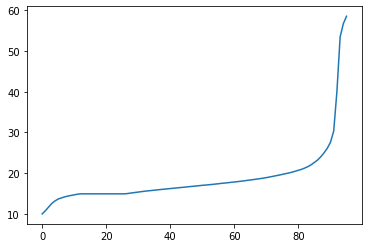

In [115]:
# plt.plot(node_coverage[u_idx_rec, l_idx_rec])
plt.plot(node_interval[u_idx_rec, l_idx_rec])

In [106]:
node_coverage

array([[0.00828698, 0.0857078 , 0.14178681, ..., 0.24338745, 0.24565785,
        0.2481553 ],
       [0.00874106, 0.10784425, 0.19082756, ..., 0.3116131 , 0.31388354,
        0.31638098],
       [0.00976274, 0.1462141 , 0.26359406, ..., 0.40572143, 0.40799183,
        0.41048926],
       ...,
       [0.1193098 , 0.5115223 , 0.81439435, ..., 0.99296176, 0.99523216,
        0.9977296 ],
       [0.1193098 , 0.5115223 , 0.81439435, ..., 0.99296176, 0.99523216,
        0.9977296 ],
       [0.1193098 , 0.5115223 , 0.81439435, ..., 0.99296176, 0.99523216,
        0.9977296 ]], dtype=float32)

In [103]:
diff_t

array([0.1069335 , 0.10764098, 0.09440064, 0.07165962, 0.06256312,
       0.0402264 , 0.03466749, 0.03042251, 0.02354962, 0.0161714 ,
       0.01627249, 0.01607037, 0.01445317, 0.01041037, 0.        ,
       0.        , 0.        , 0.        , 0.00101072, 0.01010716,
       0.00778246, 0.0071761 , 0.00596321, 0.00616533, 0.00768143,
       0.00616533, 0.00454825, 0.0044471 , 0.00262791, 0.00414389,
       0.00384074, 0.00313318, 0.00252676, 0.00293112, 0.00293106,
       0.00282997, 0.00333536, 0.00252682, 0.00282997, 0.00121289,
       0.00303209, 0.00121289, 0.00171822, 0.00101072, 0.00080854,
       0.0015161 , 0.00181925, 0.00101072, 0.00192034, 0.00181931,
       0.00121284, 0.00202143, 0.00111181, 0.00101072, 0.00101072,
       0.00111175, 0.00121289, 0.00090963, 0.00101072, 0.00090963,
       0.00121289, 0.00101066, 0.0015161 , 0.00141501, 0.00141495,
       0.00060648, 0.00090963, 0.00070751, 0.00060642, 0.00090963,
       0.00060642, 0.00060648, 0.00111175, 0.00101072, 0.00111

In [68]:
np.mean(coverage_rec)

0.9673272

In [66]:
coverage_list[:, node_idx]

array([0.08933919, 0.27829906, 0.49171492, ..., 1.        , 1.        ,
       1.        ], dtype=float32)

In [61]:
1/coverage_list[:, node_idx]

array([11.193296 ,  3.5932567,  2.0336988, ...,  1.       ,  1.       ,
        1.       ], dtype=float32)

In [62]:
coverage_nor

array([1.        , 0.25440806, 0.10140967, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [63]:
interval_nor

array([0.00387791, 0.01596006, 0.04305379, ..., 0.99542224, 0.9977629 ,
       1.        ], dtype=float32)

In [39]:
obj_min_idx

7513

In [40]:
coverage_list[obj_min_idx, node_idx]

0.9485753

In [41]:
interval_list[obj_min_idx, node_idx]


21.715014

In [42]:
coverage_nor

array([120.671234 ,  11.66755  ,   7.052842 , ...,   1.0070881,
         1.0047907,   1.0022756], dtype=float32)

In [43]:
interval_nor

array([7.4383885e-02, 8.1427948e-04, 2.1018048e-03, ..., 8.6937153e-01,
       9.2584467e-01, 1.0000000e+00], dtype=float32)

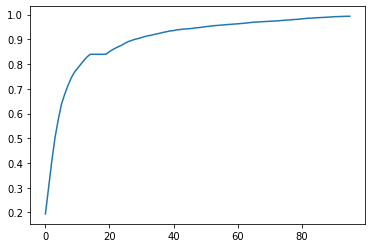

In [119]:
plt.plot(node_coverage[10,:])

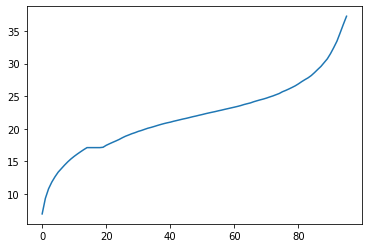

In [124]:
plt.plot(node_interval[10,:])


In [81]:
node_coverage[:,-2]


array([0.24565785, 0.31388354, 0.40799183, 0.5241231 , 0.61539334,
       0.6866841 , 0.7248269 , 0.7608128 , 0.78556025, 0.80372345,
       0.8201839 , 0.837439  , 0.8470882 , 0.8470882 , 0.8470882 ,
       0.8470882 , 0.8470882 , 0.8470882 , 0.8470882 , 0.8470882 ,
       0.8470882 , 0.8470882 , 0.8470882 , 0.8470882 , 0.8470882 ,
       0.8470882 , 0.84788287, 0.85696447, 0.86513793, 0.87308437,
       0.8813713 , 0.8890907 , 0.89510727, 0.9004427 , 0.904643  ,
       0.90872973, 0.9115677 , 0.915995  , 0.9189465 , 0.92257917,
       0.92621183, 0.92814165, 0.93075264, 0.93268245, 0.93415827,
       0.93552047, 0.93710977, 0.93847203, 0.9399478 , 0.9418776 ,
       0.94323987, 0.944148  , 0.94551027, 0.94709957, 0.9489159 ,
       0.94971055, 0.9511863 , 0.952435  , 0.9540243 , 0.955046  ,
       0.9560677 , 0.95708936, 0.95777047, 0.95913273, 0.9606085 ,
       0.96174365, 0.9631059 , 0.96390057, 0.96548986, 0.96662503,
       0.96889544, 0.9703712 , 0.97230107, 0.9741174 , 0.97570